# Kijun-sen (Base Line)

https://www.investopedia.com/terms/k/kijunsen.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'tcs.ns'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,2168.000000,2183.899902,2154.000000,2167.600098,2034.032471,1354908
2020-01-02 00:00:00+05:30,2179.949951,2179.949951,2149.199951,2157.649902,2024.695557,2380752
2020-01-03 00:00:00+05:30,2164.000000,2223.000000,2164.000000,2200.649902,2065.045654,4655761
2020-01-06 00:00:00+05:30,2205.000000,2225.949951,2187.899902,2200.449951,2064.858643,3023209
2020-01-07 00:00:00+05:30,2200.500000,2214.649902,2183.800049,2205.850098,2069.925537,2429317


In [3]:
# Kijun-sen (Base Line): (26-Period High + 26-Period Low)/2))
Period_High = df['High'].rolling(window=26).max()
Period_Low = df['Low'].rolling(window=26).min()
df['Kijun_Sen'] = (Period_High + Period_Low) / 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


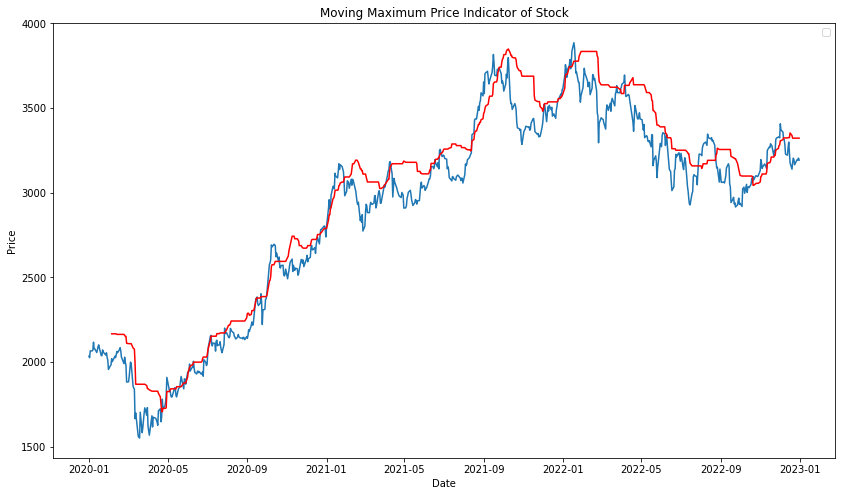

In [4]:
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(df['Kijun_Sen'], color='red')
plt.title('Moving Maximum Price Indicator of Stock')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Candlestick with Kijun-Sen

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Kijun_Sen,VolumePositive
0,18261.770833,2168.000000,2183.899902,2154.000000,2167.600098,2034.032471,1354908,NaN,False
1,18262.770833,2179.949951,2179.949951,2149.199951,2157.649902,2024.695557,2380752,NaN,False
2,18263.770833,2164.000000,2223.000000,2164.000000,2200.649902,2065.045654,4655761,NaN,False
3,18266.770833,2205.000000,2225.949951,2187.899902,2200.449951,2064.858643,3023209,NaN,False
4,18267.770833,2200.500000,2214.649902,2183.800049,2205.850098,2069.925537,2429317,NaN,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

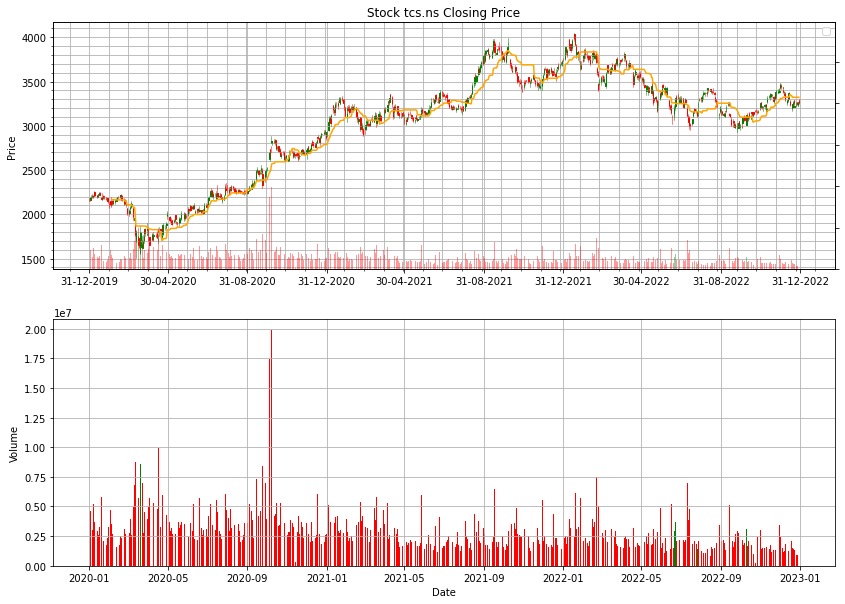

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Kijun_Sen'], color='orange')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend()

ax2 = plt.subplot(2, 1, 2)
df['VolumePositive'] = df['Open'] < df['Adj Close']
ax2.bar(df.index, df['Volume'], color=df.VolumePositive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')